In [1]:
import pandas as pd
df_neut_neg = pd.read_csv('/Users/isabellelorge/Desktop/final_with_preds.csv')

In [260]:
temporal = [' never', 'sometimes', 'already', 'often', 'generally', 'usually', 'frequently','always']
factual = ['maybe',  'perhaps', 'possibly', 'probably', 'actually',  'really', 'certainly', 'definitely']
other = ['hardly', 'slightly', 'basically', 'quite', 'pretty', 'very',  'seriously', 'completely'] 

deg_adv = temporal + factual + other

In [138]:
df_neut_neg['neutrals']

0                 is never acidic.
1                   is never sure.
2                 is never correct
3             is never beneficial.
4              is never fallacious
5                  is never honest
6            is never independent.
7               is never concrete.
8               is never peaceful.
9             is never legitimate.
10             is never enjoyable.
11             is never different.
12             is never efficient.
13                  is never open.
14          is never incompatible.
15                  is never safer
16             is never socialist.
17            is never charitable.
18               is never illegal.
19               is never visible.
20         is never insignificant.
21             is never political.
22                is never absurd.
23              is never complete.
24               is never present.
25             is never corporate.
26         is never unconditional.
27               is never corrupt.
28                  

In [137]:
for idx, i in df_neut_neg['negatives'].iteritems():
    print(df_neut_neg['adv_exp'].iloc[idx])
    print(df_neut_neg['sentences'].iloc[idx])
    print(i)
    

(' never', 'acidic')
 Making something less alkaline does not make it acidic.  Referring to ocean acidification as if it were possible, or even something that was happening, is not scientific, we can make the ocean less alkaline, maybe, but never acidic.
Making something less alkaline does not make it acidic. Referring to ocean acidification as if it were possible, or even something that was happening, is not scientific, we can make the ocean less alkaline, maybe, but not acidic.
(' never', 'sure')
 And good at everything.  But during a hire, you are never sure.
And good at everything. But during a hire, you are not sure.
(' never', 'correct')
 Shorter Krugman: Ron Paul is amazing, because unlike a stopped clock that is at least correct time twice a day, if by accident, Ron Paul is never correct
Shorter Krugman: Ron Paul is amazing, because unlike a stopped clock that is at least correct time twice a day, if by accident, Ron Paul is not correct
(' never', 'beneficial')
 I said a policy

 Yes he's a liberal like a progressive democrat, but he is definitely independent
Yes he's a liberal like a progressive democrat, but he is not independent
('definitely', 'uphill')
 For Bernie to win, this groundswell of relatively young, idealistic voters has to keep growing the way it did for Obama.  It could happen, but it's definitely uphill.
For Bernie to win, this groundswell of relatively young, idealistic voters has to keep growing the way it did for Obama. It could happen, but it's not uphill.
('definitely', 'negative')
 I have actually known some Harvard grads who have been incredibly good people. The consensus on Reddit is definitely negative.
I have actually known some Harvard grads who have been incredibly good people. The consensus on Reddit is not negative.
('definitely', 'obvious')
Unless you count the very idea of women doing philosophy, or any kind of public teaching, to be feminist. Yeah, that's definitely obvious.
Unless you count the very idea of women doing philos

In [9]:
from ast import literal_eval

for c in ['adv_preds', 'neutral_preds', 'adv_preds_base', 'neutral_preds_base']:
    df_neut_neg[c] = df_neut_neg[c].apply(lambda x: literal_eval(x))

In [4]:
for i, s in df_neut_neg['sentences'].iteritems():
    print(s)
    print (df_neut_neg['adv_preds'].iloc[i])

 Making something less alkaline does not make it acidic.  Referring to ocean acidification as if it were possible, or even something that was happening, is not scientific, we can make the ocean less alkaline, maybe, but never acidic.
((0, 0.34561452), (8, 0.0015477325), [('not', 0.34561452), ('more', 0.308264), ('still', 0.2298713), ('less', 0.050772283), ('very', 0.0074112266), ('also', 0.0059852186), ('remain', 0.0031087943), ('rather', 0.0019768162), ('never', 0.0015477325), ('stay', 0.0013996146)])
 And good at everything.  But during a hire, you are never sure.
((1, 0.25612512), (0, 0.5358503), [('never', 0.5358503), ('not', 0.25612512), ('less', 0.05557508), ('always', 0.04099057), ('rarely', 0.015384428), ('more', 0.010159908), ('too', 0.009681929), ('so', 0.008926704), ('very', 0.008861798), ('almost', 0.0050760675)])
 Shorter Krugman: Ron Paul is amazing, because unlike a stopped clock that is at least correct time twice a day, if by accident, Ron Paul is never correct
((6, 0.

In [134]:
# some analyses!
# is the prediction of original ADV higher than 'NOT'?
# where are ADV and NOT ranked in the neutral context?
# also, is correct pred in top 10?
accuracies_large = {}
accuracies_large_neut = {}
accuracies_base = {}
accuracies_base_neut = {}


MRR_large = {}
MRR_large_neut = {}
MRR_base = {}
MRR_base_neut = {}

diff_large = {}
diff_large_neut = {}
diff_base = {}
diff_base_neut = {}


for adv in deg_adv:
    accuracies_large[adv] = 0
    accuracies_large_neut[adv] = 0
    accuracies_base[adv] = 0
    accuracies_base_neut[adv] = 0
    
    MRR_large[adv] = 0
    MRR_large_neut[adv] = 0
    MRR_base[adv] = 0
    MRR_base_neut[adv] = 0

    diff_large[adv] = 0
    diff_large_neut[adv] = 0
    diff_base[adv] = 0
    diff_base_neut[adv] = 0

for adv in deg_adv:
    print(adv)
    df_adv = df_neut_neg[df_neut_neg['adv_exp'].str.contains(f"'{adv}'")]
    for i, p_l in enumerate(df_adv['adv_preds']):
        print('I', i)
        n_l = df_adv['neutral_preds'].iloc[i]
        p_b = df_adv['adv_preds_base'].iloc[i]
        n_b = df_adv['neutral_preds_base'].iloc[i]

        neg_rank_large = p_l[0][0]
        adv_rank_large = p_l[1][0]
        MRR_large[adv] += 1/(adv_rank_large+1)
        diff_large[adv] += adv_rank_large-neg_rank_large
        if adv_rank_large < neg_rank_large:
            accuracies_large[adv]+=1
            
        neg_rank_large_neut = n_l[0][0]
        adv_rank_large_neut = n_l[1][0]
        MRR_large_neut[adv] += 1/(adv_rank_large_neut+1)
        diff_large_neut[adv] += adv_rank_large_neut-neg_rank_large_neut
        if adv_rank_large_neut < neg_rank_large_neut:
            accuracies_large_neut[adv]+=1
            
        neg_rank_base = p_b[0][0]
        adv_rank_base = p_b[1][0]
        MRR_base[adv] += 1/(adv_rank_base+1)
        diff_base[adv] += adv_rank_base-neg_rank_base
        if adv_rank_base < neg_rank_base:
            accuracies_base[adv]+=1
        
        
        neg_rank_base_neut = n_b[0][0]
        adv_rank_base_neut = n_b[1][0]
        MRR_base_neut[adv] += 1/(adv_rank_base_neut+1)
        diff_base_neut[adv] += adv_rank_base_neut-neg_rank_base_neut
        if adv_rank_base_neut < neg_rank_base_neut:
            accuracies_base_neut[adv]+=1


In [261]:
from scipy import stats
# the smaller the rank, the more negative the diff, the better!! 
d_l = {}

for v in accuracies_large:
    d_l[v] ={'acc': 0, 'MRR': 0, 'diff': 0}
    d_l[v]['acc'] = accuracies_large[v]/40
    d_l[v]['MRR'] = MRR_large[v]/40
    d_l[v]['diff'] = diff_large[v]/40
print('OTHER')
other_l = sorted({k:v for k, v in d_l.items() if k in other}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(other_l)
print('FACTUAL')
factual_l = sorted({k:v for k, v in d_l.items() if k in factual}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(factual_l)
print('TEMPORAL')
temporal_l = sorted({k:v for k, v in d_l.items() if k in temporal}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(temporal)

print('average accuracy: ', sum([accuracies_large[v]/40 for v in accuracies_large])/24)
print('average MRR: ', sum([MRR_large[v]/40 for v in MRR_large])/24)
print('average diff: ', sum([diff_large[v]/40 for v in diff_large])/24)

so_l = sorted({k:v for k, v in accuracies_large.items() if k in other}.items(), key = lambda k:k[1])
sf_l = sorted({k:v for k, v in accuracies_large.items() if k in factual}.items(), key = lambda k:k[1])
st_l = sorted({k:v for k, v in accuracies_large.items() if k in temporal}.items(), key = lambda k:k[1])

# how much ease of prediction correlates with intensity?
print(stats.spearmanr(list(range(8)),[other.index(k[0]) for k in so_l]))
print(stats.spearmanr(list(range(8)),[factual.index(k[0]) for k in sf_l]))
print(stats.spearmanr(list(range(8)),[temporal.index(k[0]) for k in st_l]))

# how much accuracy in context correlates with accuracy without context?
# d1 = {}
# for v in d_l:
#     d1[v] = (d_l[v]['acc']-d_ln[v]['acc'])

# print('OTHER')
# print(sorted({k:v for k, v in d1.items() if k in other}.items(), key = lambda k:k[1], reverse=True))
# print('FACTUAL')
# print(sorted({k:v for k, v in d1.items() if k in factual}.items(), key = lambda k:k[1], reverse=True))
# print('TEMPORAL')
# print(sorted({k:v for k, v in d1.items() if k in temporal}.items(), key = lambda k:k[1], reverse=True))

OTHER
[('very', {'acc': 0.725, 'MRR': 0.5503681016980435, 'diff': -22.425}), ('pretty', {'acc': 0.625, 'MRR': 0.19027027367998, 'diff': -16.8}), ('completely', {'acc': 0.55, 'MRR': 0.3949152405912109, 'diff': -4.7}), ('slightly', {'acc': 0.525, 'MRR': 0.09381856332307728, 'diff': -9.5}), ('quite', {'acc': 0.5, 'MRR': 0.2594916616158157, 'diff': 14.375}), ('seriously', {'acc': 0.4, 'MRR': 0.09616571616212585, 'diff': 53.825}), ('basically', {'acc': 0.25, 'MRR': 0.07400610369280741, 'diff': 15.175}), ('hardly', {'acc': 0.025, 'MRR': 0.0840489540439977, 'diff': 44.375})]
FACTUAL
[('really', {'acc': 0.725, 'MRR': 0.24820748440023116, 'diff': -21.85}), ('possibly', {'acc': 0.5, 'MRR': 0.12651156825159232, 'diff': 32.7}), ('maybe', {'acc': 0.425, 'MRR': 0.16357214371018916, 'diff': 84.9}), ('probably', {'acc': 0.4, 'MRR': 0.10214808630050005, 'diff': 2.175}), ('actually', {'acc': 0.35, 'MRR': 0.18352471606611626, 'diff': 5.9}), ('perhaps', {'acc': 0.275, 'MRR': 0.06421658869360565, 'diff': 4

In [265]:
o_l = [i[1]['acc'] for i in sorted(other_l, key = lambda k : other.index(k[0]))]
o_ln = [i[1]['acc'] for i in sorted(other_ln, key = lambda k : other.index(k[0]))]
o_b = [i[1]['acc'] for i in sorted(other_b, key = lambda k : other.index(k[0]))]
o_bn = [i[1]['acc'] for i in sorted(other_bn, key = lambda k : other.index(k[0]))]

In [266]:
f_l = [i[1]['acc'] for i in sorted(factual_l, key = lambda k : factual.index(k[0]))]
f_ln = [i[1]['acc'] for i in sorted(factual_ln, key = lambda k : factual.index(k[0]))]
f_b = [i[1]['acc'] for i in sorted(factual_b, key = lambda k : factual.index(k[0]))]
f_bn = [i[1]['acc'] for i in sorted(factual_bn, key = lambda k : factual.index(k[0]))]

In [267]:
t_l = [i[1]['acc'] for i in sorted(temporal_l, key = lambda k : temporal.index(k[0]))]
t_ln = [i[1]['acc'] for i in sorted(temporal_ln, key = lambda k : temporal.index(k[0]))]
t_b = [i[1]['acc'] for i in sorted(temporal_b, key = lambda k : temporal.index(k[0]))]
t_bn = [i[1]['acc'] for i in sorted(temporal_bn, key = lambda k : temporal.index(k[0]))]

In [268]:
sorted(factual_l, key = lambda k : factual.index(k[0]))

[('maybe', {'acc': 0.425, 'MRR': 0.16357214371018916, 'diff': 84.9}),
 ('perhaps', {'acc': 0.275, 'MRR': 0.06421658869360565, 'diff': 42.0}),
 ('possibly', {'acc': 0.5, 'MRR': 0.12651156825159232, 'diff': 32.7}),
 ('probably', {'acc': 0.4, 'MRR': 0.10214808630050005, 'diff': 2.175}),
 ('actually', {'acc': 0.35, 'MRR': 0.18352471606611626, 'diff': 5.9}),
 ('really', {'acc': 0.725, 'MRR': 0.24820748440023116, 'diff': -21.85}),
 ('certainly', {'acc': 0.225, 'MRR': 0.11673036764580177, 'diff': 18.675}),
 ('definitely', {'acc': 0.25, 'MRR': 0.08789945887132253, 'diff': 55.05})]

In [273]:
sorted(other_l, key = lambda k : other.index(k[0]))

[('hardly', {'acc': 0.025, 'MRR': 0.0840489540439977, 'diff': 44.375}),
 ('slightly', {'acc': 0.525, 'MRR': 0.09381856332307728, 'diff': -9.5}),
 ('basically', {'acc': 0.25, 'MRR': 0.07400610369280741, 'diff': 15.175}),
 ('quite', {'acc': 0.5, 'MRR': 0.2594916616158157, 'diff': 14.375}),
 ('pretty', {'acc': 0.625, 'MRR': 0.19027027367998, 'diff': -16.8}),
 ('very', {'acc': 0.725, 'MRR': 0.5503681016980435, 'diff': -22.425}),
 ('seriously', {'acc': 0.4, 'MRR': 0.09616571616212585, 'diff': 53.825}),
 ('completely', {'acc': 0.55, 'MRR': 0.3949152405912109, 'diff': -4.7})]

In [274]:
sorted(temporal_l, key = lambda k : temporal.index(k[0]))

[(' never', {'acc': 0.175, 'MRR': 0.24307157872714832, 'diff': 9.775}),
 ('sometimes', {'acc': 0.55, 'MRR': 0.18005722093943818, 'diff': -12.925}),
 ('already', {'acc': 0.25, 'MRR': 0.09974669209479751, 'diff': 20.175}),
 ('often', {'acc': 0.375, 'MRR': 0.22101984882358305, 'diff': -2.475}),
 ('generally', {'acc': 0.35, 'MRR': 0.10861424506381287, 'diff': -0.375}),
 ('usually', {'acc': 0.35, 'MRR': 0.11513225070964965, 'diff': 4.85}),
 ('frequently', {'acc': 0.225, 'MRR': 0.02832851722070597, 'diff': 96.3}),
 ('always', {'acc': 0.425, 'MRR': 0.2478908550977482, 'diff': 8.7})]

In [311]:
o_concat = np.concatenate(([o_l], [o_ln], [o_b], [o_bn]))
f_concat = np.concatenate(([f_l], [f_ln], [f_b], [f_bn]))
t_concat = np.concatenate(([t_l], [t_ln], [t_b], [t_bn]))
o_diff = np.concatenate(([np.array(o_l)-np.array(o_ln)], [np.array(o_b)-np.array(o_bn)]))
f_diff = np.concatenate(([np.array(f_l)-np.array(f_ln)], [np.array(f_b)-np.array(f_bn)]))
t_diff = np.concatenate(([np.array(t_l)-np.array(t_ln)], [np.array(t_b)-np.array(t_bn)]))

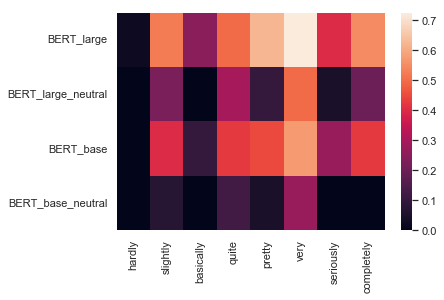

In [307]:
# heatmaps
import numpy as np
import seaborn as sns
sns.set_theme()

# 'other' category isn't bad
# but you can see for BERT large the neutral context seems like it already contains information/biases
# (simply means these are frequent adverbs?) (should check the DIFFERENCE in accuracy..?)
labels_o = [i[0] for i in sorted(other_l, key = lambda k : other.index(k[0]))]
models = ['BERT_large', 'BERT_large_neutral', 'BERT_base', 'BERT_base_neutral']

plot_other = sns.heatmap(o_concat, 
            yticklabels = models,
            xticklabels = labels_o)

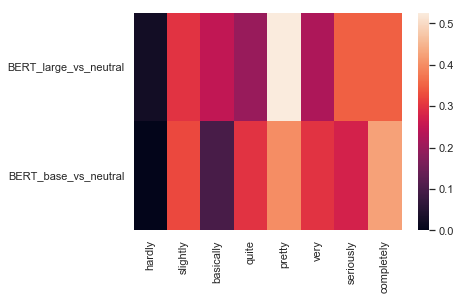

In [310]:
# BERT base does actually better..? (memorise frequency less, more influence of context?)
plot_other_diff = sns.heatmap(o_diff, 
            yticklabels = ['BERT_large_vs_neutral', 'BERT_base_vs_neutral'],
            xticklabels = labels_o)

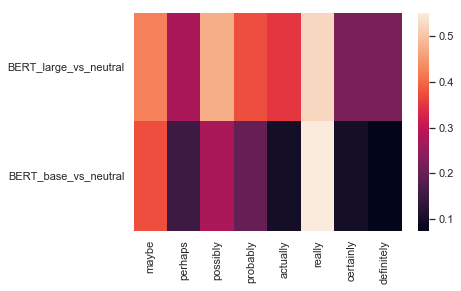

In [313]:
# factual seems reversed..?!
plot_factual_diff = sns.heatmap(f_diff, 
            yticklabels = ['BERT_large_vs_neutral', 'BERT_base_vs_neutral'],
            xticklabels = labels_f)

In [314]:
f_diff

array([[0.425, 0.275, 0.475, 0.375, 0.35 , 0.525, 0.225, 0.225],
       [0.375, 0.15 , 0.275, 0.2  , 0.1  , 0.55 , 0.1  , 0.075]])

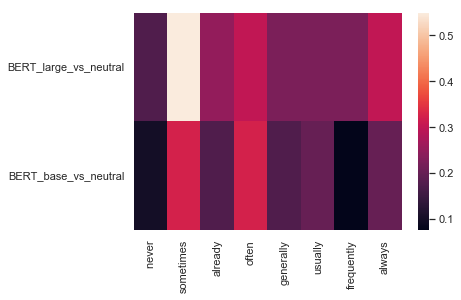

In [312]:
# temporal is actually really bad...
plot_temporal_diff = sns.heatmap(t_diff, 
            yticklabels = ['BERT_large_vs_neutral', 'BERT_base_vs_neutral'],
            xticklabels = labels_t)

In [305]:
o_concat

array([[0.025, 0.525, 0.25 , 0.5  , 0.625, 0.725, 0.4  , 0.55 ],
       [0.   , 0.225, 0.   , 0.3  , 0.1  , 0.5  , 0.05 , 0.2  ],
       [0.   , 0.4  , 0.1  , 0.425, 0.45 , 0.575, 0.275, 0.425],
       [0.   , 0.075, 0.   , 0.125, 0.05 , 0.275, 0.   , 0.   ]])

In [300]:
o_diff

array([[0.025, 0.3  , 0.25 , 0.2  , 0.525, 0.225, 0.35 , 0.35 ],
       [0.   , 0.325, 0.1  , 0.3  , 0.4  , 0.3  , 0.275, 0.425]])

In [297]:
np.array(o_b)-np.array(o_bn)

array([0.   , 0.325, 0.1  , 0.3  , 0.4  , 0.3  , 0.275, 0.425])

In [298]:
o_b

[0.0, 0.4, 0.1, 0.425, 0.45, 0.575, 0.275, 0.425]

In [299]:
o_bn

[0.0, 0.075, 0.0, 0.125, 0.05, 0.275, 0.0, 0.0]

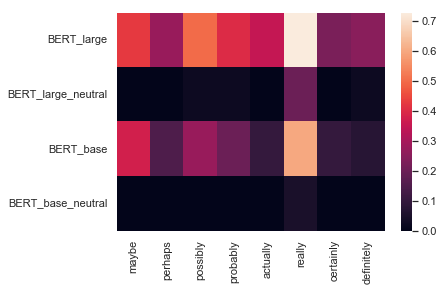

In [284]:
# factual category is pretty bad
# in this case there is little effect of base frequency apart from 'really'
labels_f = [i[0] for i in sorted(factual_l, key = lambda k : factual.index(k[0]))]

plot_factual = sns.heatmap(f_concat, 
            yticklabels = models,
            xticklabels = labels_f)

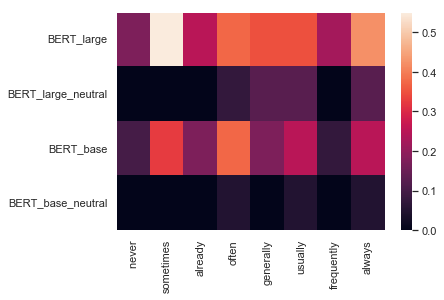

In [285]:
# tenmporal category is ok
labels_t = [i[0] for i in sorted(temporal_l, key = lambda k : temporal.index(k[0]))]

plot_temporal = sns.heatmap(t_concat, 
            yticklabels = models,
            xticklabels = labels_t)

In [ ]:
# confusion matrix 

In [262]:
d_ln  = {}
for v in accuracies_large_neut:
    d_ln[v] ={'acc': 0, 'MRR': 0, 'diff': 0}
    d_ln[v]['acc'] = accuracies_large_neut[v]/40
    d_ln[v]['MRR'] = MRR_large_neut[v]/40
    d_ln[v]['diff'] = diff_large_neut[v]/40
print('OTHER')
other_ln = sorted({k:v for k, v in d_ln.items() if k in other}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(other_ln)
print('FACTUAL')
factual_ln = sorted({k:v for k, v in d_ln.items() if k in factual}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(factual_ln)
print('TEMPORAL')
temporal_ln = sorted({k:v for k, v in d_ln.items() if k in temporal}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(temporal_ln)

print('average accuracy: ', sum([accuracies_large_neut[v]/40 for v in accuracies_large_neut])/24)
print('average MRR: ', sum([MRR_large_neut[v]/40 for v in MRR_large_neut])/24)
print('average diff: ', sum([diff_large_neut[v]/40 for v in diff_large_neut])/24)

so = sorted({k:v for k, v in accuracies_large_neut.items() if k in other}.items(), key = lambda k:k[1])
sf = sorted({k:v for k, v in accuracies_large_neut.items() if k in factual}.items(), key = lambda k:k[1])
st = sorted({k:v for k, v in accuracies_large_neut.items() if k in temporal}.items(), key = lambda k:k[1])

print(stats.spearmanr(list(range(8)),[other.index(k[0]) for k in so]))
print(stats.spearmanr(list(range(8)),[factual.index(k[0]) for k in sf]))
print(stats.spearmanr(list(range(8)),[temporal.index(k[0]) for k in st]))


OTHER
[('very', {'acc': 0.5, 'MRR': 0.49838452911822495, 'diff': 2.525}), ('quite', {'acc': 0.3, 'MRR': 0.2700101310910062, 'diff': 6.975}), ('slightly', {'acc': 0.225, 'MRR': 0.16781080616087968, 'diff': 42.375}), ('completely', {'acc': 0.2, 'MRR': 0.30372608307662763, 'diff': 68.075}), ('pretty', {'acc': 0.1, 'MRR': 0.09395506584225158, 'diff': 115.05}), ('seriously', {'acc': 0.05, 'MRR': 0.03864641646875203, 'diff': 84.675}), ('hardly', {'acc': 0.0, 'MRR': 0.015492732164961562, 'diff': 198.35}), ('basically', {'acc': 0.0, 'MRR': 0.04636995834214429, 'diff': 84.225})]
FACTUAL
[('really', {'acc': 0.2, 'MRR': 0.11419629091226444, 'diff': 79.0}), ('possibly', {'acc': 0.025, 'MRR': 0.016014851224406195, 'diff': 145.875}), ('probably', {'acc': 0.025, 'MRR': 0.030553631717904144, 'diff': 117.9}), ('definitely', {'acc': 0.025, 'MRR': 0.018697504192044034, 'diff': 236.3}), ('maybe', {'acc': 0.0, 'MRR': 0.002592361280454097, 'diff': 1000.275}), ('perhaps', {'acc': 0.0, 'MRR': 0.00701357625707

In [263]:
d_b = {}
for v in accuracies_base:
    d_b[v] ={'acc': 0, 'MRR': 0, 'diff': 0}
    d_b[v]['acc'] = accuracies_base[v]/40
    d_b[v]['MRR'] = MRR_base[v]/40
    d_b[v]['diff'] = diff_base[v]/40
print('OTHER')
other_b = sorted({k:v for k, v in d_b.items() if k in other}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(other_b)
print('FACTUAL')
factual_b = sorted({k:v for k, v in d_b.items() if k in factual}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(factual_b)
print('TEMPORAL')
temporal_b = sorted({k:v for k, v in d_b.items() if k in temporal}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(temporal_b)

print('average accuracy: ', sum([accuracies_base[v]/40 for v in accuracies_base])/24)
print('average MRR: ', sum([MRR_base[v]/40 for v in MRR_base])/24)
print('average diff: ', sum([diff_base[v]/40 for v in diff_base])/24)

so = sorted({k:v for k, v in accuracies_base.items() if k in other}.items(), key = lambda k:k[1])
sf = sorted({k:v for k, v in accuracies_base.items() if k in factual}.items(), key = lambda k:k[1])
st = sorted({k:v for k, v in accuracies_base.items() if k in temporal}.items(), key = lambda k:k[1])

print(stats.spearmanr(list(range(8)),[other.index(k[0]) for k in so]))
print(stats.spearmanr(list(range(8)),[factual.index(k[0]) for k in sf]))
print(stats.spearmanr(list(range(8)),[temporal.index(k[0]) for k in st]))

# how much accuracy in context correlates with accuracy without context?
# d2 = {}
# for v in d_l:
#     d2[v] = (d_b[v]['acc']-d_bn[v]['acc'])

# print('OTHER')
# print(sorted({k:v for k, v in d2.items() if k in other}.items(), key = lambda k:k[1], reverse=True))
# print('FACTUAL')
# print(sorted({k:v for k, v in d2.items() if k in factual}.items(), key = lambda k:k[1], reverse=True))
# print('TEMPORAL')
# print(sorted({k:v for k, v in d2.items() if k in temporal}.items(), key = lambda k:k[1], reverse=True))

OTHER
[('very', {'acc': 0.575, 'MRR': 0.5395042186915251, 'diff': -15.025}), ('pretty', {'acc': 0.45, 'MRR': 0.2786096258107855, 'diff': -4.7}), ('quite', {'acc': 0.425, 'MRR': 0.23513170390346216, 'diff': 0.025}), ('completely', {'acc': 0.425, 'MRR': 0.3596614164876743, 'diff': -4.725}), ('slightly', {'acc': 0.4, 'MRR': 0.10236545016306062, 'diff': 64.875}), ('seriously', {'acc': 0.275, 'MRR': 0.14063146362045528, 'diff': 20.45}), ('basically', {'acc': 0.1, 'MRR': 0.04517850959544388, 'diff': 58.5}), ('hardly', {'acc': 0.0, 'MRR': 0.06652947109318198, 'diff': 57.525})]
FACTUAL
[('really', {'acc': 0.6, 'MRR': 0.21729246084537485, 'diff': -13.875}), ('maybe', {'acc': 0.375, 'MRR': 0.17059831685186355, 'diff': 166.3}), ('possibly', {'acc': 0.275, 'MRR': 0.10186615331345154, 'diff': 63.475}), ('probably', {'acc': 0.2, 'MRR': 0.12508419714861618, 'diff': 19.225}), ('perhaps', {'acc': 0.15, 'MRR': 0.03227405809730179, 'diff': 90.55}), ('actually', {'acc': 0.1, 'MRR': 0.12286832886466417, 'd

In [264]:
d_bn = {}
for v in accuracies_base_neut:
    d_bn[v] ={'acc': 0, 'MRR': 0, 'diff': 0}
    d_bn[v]['acc'] = accuracies_base_neut[v]/40
    d_bn[v]['MRR'] = MRR_base_neut[v]/40
    d_bn[v]['diff'] = diff_base_neut[v]/40
print('OTHER')
other_bn = sorted({k:v for k, v in d_bn.items() if k in other}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(other_bn)
print('FACTUAL')
factual_bn = sorted({k:v for k, v in d_bn.items() if k in factual}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(factual_bn)
print('TEMPORAL')
temporal_bn = sorted({k:v for k, v in d_bn.items() if k in temporal}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(temporal_bn)

print('average accuracy: ', sum([accuracies_base_neut[v]/40 for v in accuracies_base_neut])/24)
print('average MRR: ', sum([MRR_base_neut[v]/40 for v in MRR_base_neut])/24)
print('average diff: ', sum([diff_base_neut[v]/40 for v in diff_base_neut])/24)

print(sorted({k:v for k, v in accuracies_base_neut.items() if k in other}.items(), key = lambda k:k[1], reverse=True))
print(sorted({k:v for k, v in accuracies_base_neut.items() if k in factual}.items(), key = lambda k:k[1], reverse=True))
print(sorted({k:v for k, v in accuracies_base_neut.items() if k in temporal}.items(), key = lambda k:k[1], reverse=True))

so = sorted({k:v for k, v in accuracies_base_neut.items() if k in other}.items(), key = lambda k:k[1])
sf = sorted({k:v for k, v in accuracies_base_neut.items() if k in factual}.items(), key = lambda k:k[1])
st = sorted({k:v for k, v in accuracies_base_neut.items() if k in temporal}.items(), key = lambda k:k[1])

print(stats.spearmanr(list(range(8)),[other.index(k[0]) for k in so]))
print(stats.spearmanr(list(range(8)),[factual.index(k[0]) for k in sf]))
print(stats.spearmanr(list(range(8)),[temporal.index(k[0]) for k in st]))

OTHER
[('very', {'acc': 0.275, 'MRR': 0.42226665573705047, 'diff': 5.675}), ('quite', {'acc': 0.125, 'MRR': 0.23130700293072368, 'diff': 21.2}), ('slightly', {'acc': 0.075, 'MRR': 0.12517988952674924, 'diff': 62.225}), ('pretty', {'acc': 0.05, 'MRR': 0.07860003934365922, 'diff': 147.875}), ('hardly', {'acc': 0.0, 'MRR': 0.026288121790362533, 'diff': 188.85}), ('basically', {'acc': 0.0, 'MRR': 0.05271353890592294, 'diff': 102.1}), ('seriously', {'acc': 0.0, 'MRR': 0.06182452978802613, 'diff': 90.85}), ('completely', {'acc': 0.0, 'MRR': 0.18724161936818443, 'diff': 141.425})]
FACTUAL
[('really', {'acc': 0.05, 'MRR': 0.08024762315982199, 'diff': 41.275}), ('maybe', {'acc': 0.0, 'MRR': 0.0032148794686427326, 'diff': 921.05}), ('perhaps', {'acc': 0.0, 'MRR': 0.00654339618018524, 'diff': 384.05}), ('possibly', {'acc': 0.0, 'MRR': 0.014615981610960027, 'diff': 177.85}), ('probably', {'acc': 0.0, 'MRR': 0.022120422602523844, 'diff': 107.625}), ('actually', {'acc': 0.0, 'MRR': 0.050490735364604

In [ ]:
# RESULTS (accuracy = is original intensifier ADV ranked higher than opposite, ie NOT)
# 1. both models clearly make use of context (LARGE: 0.40 accuracy vs. 0.08, BASE: 0.26 vs. 0.03)
# 2. BERT large does considerably better than BERT base
# 3. Accuracy is still low given this is a fairly conservative test ? but it's hard to know without humans 
#    how many of these are actually predictable
# 4. For the category 'other', correlation between intensity rankings tends to go up with context, 
#    but not for the factual and temporal categories. 
#    ! in neutral context, correlations can't be trusted (mostly zeros)
#    ! none of the models have the expected top and bottom items in the right place
#    (ie, distinguishing more intense items more easily), but predictability may vary across items
# 5. BERT still only above chance for 'very', 'pretty' and 'really'